In [20]:
# 連接 Elasticsearch

In [21]:
from datetime import datetime
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

In [22]:
es_ip = "http://127.0.0.1:9200"

In [23]:
es = Elasticsearch(es_ip)

In [24]:
# 查詢資料(讀取單一筆資料)

In [25]:
res = es.get(index="winlogbeat", doc_type="doc", id="IM3k130BMs_nTerjgcWJ")
print(res['_source'])

{'@timestamp': '2021-12-20T12:50:14.534Z', 'log': {'level': 'information'}, 'host': {'name': 'DESKTOP-T3V8EOP', 'ip': ['fe80::1911:e65c:d649:9768', '192.168.56.1', 'fe80::24c3:baf3:3d58:f2af', '169.254.242.175', 'fe80::a832:f35:3de:862c', '169.254.134.44', 'fe80::d4a8:14f8:2744:a74a', '192.168.0.83', 'fe80::4d6b:1d3e:cee1:343d', '169.254.52.61'], 'mac': ['0a:00:27:00:00:10', '24:ee:9a:ff:17:da', '26:ee:9a:ff:17:d9', '24:ee:9a:ff:17:d9', '24:ee:9a:ff:17:dd'], 'hostname': 'DESKTOP-T3V8EOP', 'architecture': 'x86_64', 'os': {'version': '10.0', 'family': 'windows', 'name': 'Windows 10 Pro', 'kernel': '10.0.22000.318 (WinBuild.160101.0800)', 'build': '22000.318', 'type': 'windows', 'platform': 'windows'}, 'id': '1f725ed7-b14c-494d-9fc1-4bc3eeb0b29b'}, 'winlog': {'record_id': 492, 'api': 'wineventlog', 'provider_guid': '{5770385f-c22a-43e0-bf4c-06f5698ffbd9}', 'process': {'pid': 53848, 'thread': {'id': 26096}}, 'version': 5, 'channel': 'Microsoft-Windows-Sysmon/Operational', 'event_id': '1', 

In [26]:
# 查詢資料(取得前120筆資料)

In [27]:
query_str = '{"query":{"range":{"@timestamp":{"gte":"2021-12-20", "lte":"2021-12-20"}}}}'
res = es.search(index="winlogbeat", body=query_str, from_=0, size=120)

In [28]:
# 取得筆數

In [29]:
total_hits = res["hits"]["total"]
print("total : " + str(total_hits))

total : 8028


In [30]:
# 顯示 120 筆資料

In [31]:
print(res["hits"]["hits"])

[{'_index': 'winlogbeat', '_type': 'doc', '_id': 'IM3k130BMs_nTerjgcWJ', '_score': 1.0, '_source': {'@timestamp': '2021-12-20T12:50:14.534Z', 'log': {'level': 'information'}, 'host': {'name': 'DESKTOP-T3V8EOP', 'ip': ['fe80::1911:e65c:d649:9768', '192.168.56.1', 'fe80::24c3:baf3:3d58:f2af', '169.254.242.175', 'fe80::a832:f35:3de:862c', '169.254.134.44', 'fe80::d4a8:14f8:2744:a74a', '192.168.0.83', 'fe80::4d6b:1d3e:cee1:343d', '169.254.52.61'], 'mac': ['0a:00:27:00:00:10', '24:ee:9a:ff:17:da', '26:ee:9a:ff:17:d9', '24:ee:9a:ff:17:d9', '24:ee:9a:ff:17:dd'], 'hostname': 'DESKTOP-T3V8EOP', 'architecture': 'x86_64', 'os': {'version': '10.0', 'family': 'windows', 'name': 'Windows 10 Pro', 'kernel': '10.0.22000.318 (WinBuild.160101.0800)', 'build': '22000.318', 'type': 'windows', 'platform': 'windows'}, 'id': '1f725ed7-b14c-494d-9fc1-4bc3eeb0b29b'}, 'winlog': {'record_id': 492, 'api': 'wineventlog', 'provider_guid': '{5770385f-c22a-43e0-bf4c-06f5698ffbd9}', 'process': {'pid': 53848, 'thread':

In [32]:
query_str = {"size": 0,"aggregations": {"result": {"terms": {"field": "winlog.computer_name.keyword","order": [{"_count": "desc"}]}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]
#print(result)

Text(0.5, 1.0, 'Event Logs')

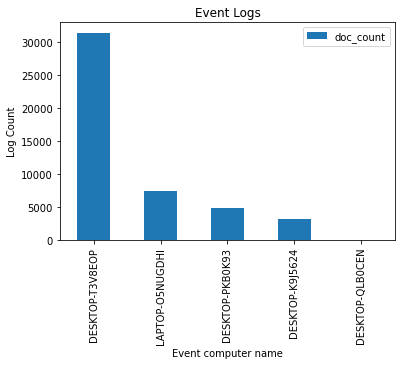

In [33]:
event_pd = pd.DataFrame(result, columns=["key", "doc_count"])
#print(event_pd)
event_pd.plot(x="key", y="doc_count", kind="bar");
plt.xlabel('Event computer name')
plt.ylabel('Log Count')
plt.title('Event Logs')

In [21]:
# IP查詢

In [22]:
request_headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) ' \
    'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36'
}
for ip in event_pd["key"]:
    print(ip)
    req = requests.get("https://ipapi.co/"+ip+"/json", headers=request_headers)
    print(req.json())
    time.sleep(5)

13.107.42.12
{'ip': '13.107.42.12', 'version': 'IPv4', 'city': 'Newark', 'region': 'New Jersey', 'region_code': 'NJ', 'country': 'US', 'country_name': 'United States', 'country_code': 'US', 'country_code_iso3': 'USA', 'country_capital': 'Washington', 'country_tld': '.us', 'continent_code': 'NA', 'in_eu': False, 'postal': '07102', 'latitude': 40.7265, 'longitude': -74.1782, 'timezone': 'America/New_York', 'utc_offset': '-0500', 'country_calling_code': '+1', 'currency': 'USD', 'currency_name': 'Dollar', 'languages': 'en-US,es-US,haw,fr', 'country_area': 9629091.0, 'country_population': 327167434, 'asn': 'AS8068', 'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'}
52.35.59.213
{'ip': '52.35.59.213', 'version': 'IPv4', 'city': 'Boardman', 'region': 'Oregon', 'region_code': 'OR', 'country': 'US', 'country_name': 'United States', 'country_code': 'US', 'country_code_iso3': 'USA', 'country_capital': 'Washington', 'country_tld': '.us', 'continent_code': 'NA', 'in_eu': False, 'postal': '97818', 'latitude': 4